## **NUESTRA PRIMERA RED NEURONAL: MNIST DATASET**

Inspeccionar liberrías y versiones en el entorno de Google Colab

In [1]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.5
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.4.1
arviz==0.15.1
astropy==5.3.3
astunparse==1.6.3
async-timeout==4.0.3
attrs==23.1.0
audioread==3.0.0
autograd==1.6.2
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blinker==1.4
blis==0.7.10
blosc2==2.0.0
bokeh==3.2.2
bqplot==0.12.40
branca==0.6.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.1
catalogue==2.0.9
certifi==2023.7.22
cffi==1.15.1
chardet==5.2.0
charset-normalizer==3.2.0
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.4.1
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.2
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.0
convertdate==2.4.0
cryptography==41.0.3
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.11.0
cymem==2.0.7
Cython==3.0.2
da

Importar liberías más importantes y ver versión.

In [2]:
# Importaremos Tensorflow 2.X y Numpy
import numpy as np
import tensorflow as tf
tf.__version__

'2.13.0'

#### **- Cargando el conjunto de datos**

In [12]:
# Importamos el dataset MNIST y cargamos los datos
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(np.unique(y_train))
print(np.bincount(y_train))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[0 1 2 3 4 5 6 7 8 9]
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


#### **- Inspeccionando el conjunto de datos**

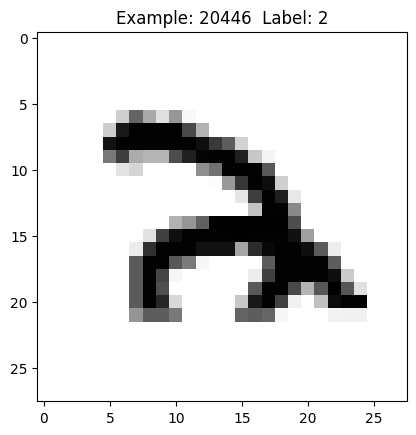

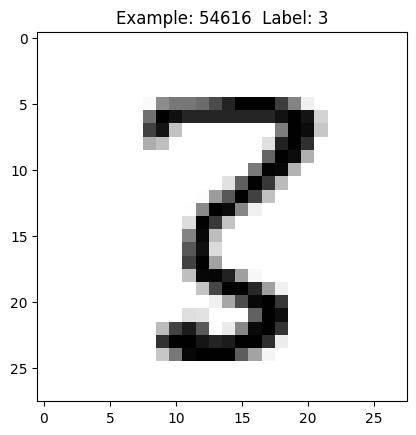

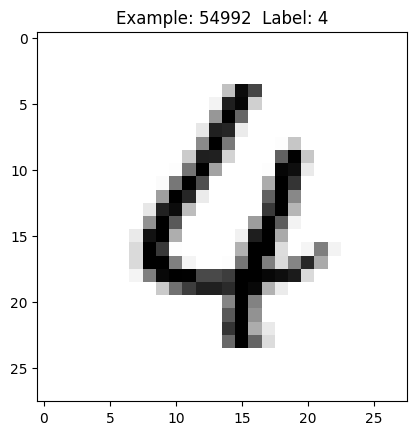

In [7]:
import matplotlib.pyplot as plt
# Función auxiliar para visualizar datos de entrenamiento de manera aleatoria
def display_digit(num):
  # Seleccionar la imagen num de mnist.train.images y hacer un reshape al tamaño de la imagen
  image = x_train[num,:,:]
  # Seleccionar el target num de mnist.train.labels
  label = y_train[num]
  # Mostrar
  plt.title('Example: %d  Label: %d' % (num, label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()

# Mostramos algunos ejemplos
display_digit(np.random.randint(0, x_train.shape[0]))
display_digit(np.random.randint(0, x_train.shape[0]))
display_digit(np.random.randint(0, x_train.shape[0]))

#### **- Acondicionando el conjunto de datos**

In [15]:
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Estandarizar rango imagenes a [0, 1]
x_train_norm, x_test_norm = x_train / 255, x_test / 255
print(np.max(x_train_norm))
# Obtener ohe de etiquetas
y_train_oht = to_categorical(y_train, num_classes=10)
print(y_train_oht.shape)
# Split train-val
x_tr, x_val, y_tr, y_val = train_test_split(x_train_norm, y_train_oht, test_size=0.1, random_state=42)
print(x_tr.shape)
print(x_val.shape)

1.0
(60000, 10)
(54000, 28, 28)
(6000, 28, 28)


#### **- Creando la topología de Red Neuronal (MLP) y entrenándola**

In [ ]:
# Importamos modulos necesarios para programar la red
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Codificamos la arquitectura de nuestra primera red neuronal!
model = Sequential()
model.add((Flatten()))
model.add(Dense(512, input_shape=(28*28,), activation="relu"))
model.add(Dense(10, activation="softmax"))

In [21]:
# Optimizador
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate=0.005)

In [23]:
# Compilar
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [25]:
# Entrenamiento
H = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=50, batch_size=128)


Epoch 1/50
422/422 [==============================] - 6s 4ms/step - loss: 1.5101 - accuracy: 0.6538 - val_loss: 0.9875 - val_accuracy: 0.8048
Epoch 2/50
422/422 [==============================] - 2s 4ms/step - loss: 0.7879 - accuracy: 0.8382 - val_loss: 0.6561 - val_accuracy: 0.8578
Epoch 3/50
422/422 [==============================] - 2s 4ms/step - loss: 0.5871 - accuracy: 0.8659 - val_loss: 0.5322 - val_accuracy: 0.8730
Epoch 4/50
422/422 [==============================] - 2s 4ms/step - loss: 0.4991 - accuracy: 0.8793 - val_loss: 0.4677 - val_accuracy: 0.8842
Epoch 5/50
422/422 [==============================] - 2s 5ms/step - loss: 0.4491 - accuracy: 0.8874 - val_loss: 0.4275 - val_accuracy: 0.8895
Epoch 6/50
422/422 [==============================] - 3s 7ms/step - loss: 0.4163 - accuracy: 0.8923 - val_loss: 0.3996 - val_accuracy: 0.8957
Epoch 7/50
422/422 [==============================] - 2s 4ms/step - loss: 0.3927 - accuracy: 0.8969 - val_loss: 0.3783 - val_accuracy: 0.8995
Epoch 

#### **- Observando el proceso de entrenamiento para tomar decisiones**

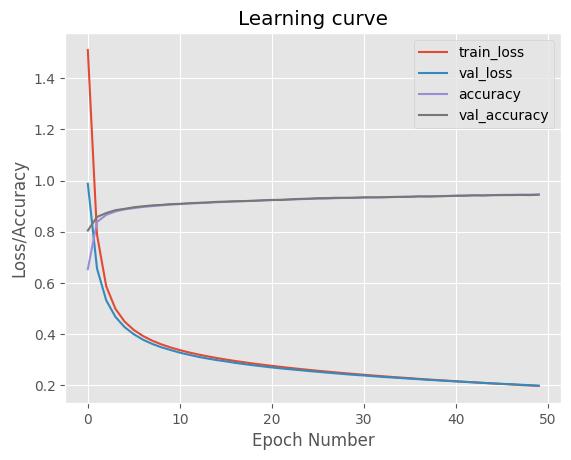

In [26]:
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_accuracy")
plt.title("Learning curve")
plt.xlabel("Epoch Number")
plt.ylabel("Loss/Accuracy")
plt.legend()

#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [30]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test_norm, batch_size=128)
print(y_test[0])
print(predictions[0])
print(classification_report(y_test, predictions.argmax(axis=1)))
# Print network summary
print(model.summary())


[INFO]: Evaluando red neuronal...
79/79 [==============================] - 0s 4ms/step
7
[6.1883657e-05 2.0247482e-07 4.1661412e-04 2.7974059e-03 1.1988316e-06
 6.5928616e-05 2.9479654e-08 9.9633491e-01 2.5929769e-05 2.9595519e-04]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.94      0.94      1032
           3       0.93      0.94      0.93      1010
           4       0.94      0.94      0.94       982
           5       0.95      0.91      0.93       892
           6       0.94      0.96      0.95       958
           7       0.95      0.94      0.94      1028
           8       0.93      0.93      0.93       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000

Model: "s

--------------------------------------------------------------------------

## **MLP APLICADO A TEXTO: EJEMPLO REUTERS**

#### **- Cargando el conjunto de datos**

In [37]:
import numpy as np
import tensorflow as tf
# Importamos el dataset REUTERS y cargamos los datos
reuters = tf.keras.datasets.reuters
WORD_LIMIT = 10000
(training_data, training_labels), (testing_data, testing_labels) = reuters.load_data(num_words=WORD_LIMIT)
print(training_data.shape)
print(training_labels.shape)
print(testing_data.shape)
print(testing_labels.shape)
print(np.unique(training_labels))
print(np.unique(testing_labels))
print(training_data[5248])

(8982,)
(8982,)
(2246,)
(2246,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
[1, 2, 65, 81, 8, 16, 40, 515, 10, 2, 339, 21, 25, 2, 2, 7, 8474, 6015, 2, 2184, 50, 23, 596, 814, 28, 10, 101, 5, 19, 19, 11, 1396, 983, 5, 249, 9, 279, 428, 5, 5901, 718, 4, 49, 8, 16, 40, 10, 119, 20, 885, 128, 7, 4, 339, 50, 23, 5519, 22, 246, 2, 2, 5953, 2, 164, 83, 1761, 9, 83, 1501, 983, 549, 2, 51, 1882, 4134, 3835, 5159, 1688, 4, 4585, 16, 152, 16, 8, 4, 1004, 2578, 55, 1299, 381, 427, 201, 17, 12]


#### **- Inspeccionando el conjunto de datos**

In [36]:
# Los datos son numericos para decodificarlos, se puede usar reuters.get_word_index()
word_index = reuters.get_word_index()
reverse_word_index = dict({value : key for key, value in word_index.items()})
decoded = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in training_data[5248]]
)
decoded

550378/550378 [==============================] - 1s 1us/step


'? ? oil corp said it has completed a ? well on its ? ? in jefferson davis ? la which is currently producing at a rate of 1 1 mln cubic feet of gas and 40 barrels of condensate daily the company said it has a 20 pct working interest in the well which is flowing from lower ? ? sand ? between 10 104 and 10 110 feet additional ? but possibly productive zones exist behind the pipe it added it said the remaining owners are privately held petroleum companies reuter 3'

#### **- Acondicionando el conjunto de datos**

In [38]:
# Función auxiliar para representar las palabras (que no entiende nuestra red neuronal) en números
import numpy as np
# one hot encoding del input, vector con cada indice indicando si una palabra esta presente
def one_hot_encode(data):
    encoded = np.zeros((len(data),WORD_LIMIT))
    for i, v in enumerate(data):
        encoded[i,v] = 1 # localiza las columnas del genero correspondiente, marca con 1
    return encoded

In [42]:
# Convertimos nuestras palabras a números
x_train = one_hot_encode(training_data)
x_test = one_hot_encode(testing_data)
print(x_train.shape)
print(x_test.shape)

(8982, 10000)
(2246, 10000)


In [47]:
# Codificar ohe de las etiquetas
from tensorflow.keras.utils import to_categorical
y_train_oht = to_categorical(training_labels, num_classes=46)
y_test_oht = to_categorical(testing_labels, num_classes=46)

#### **- Creando la topología de Red Neuronal (MLP) y entrenándola**

In [45]:
# Importamos modulos necesarios para programar la red
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Codificamos la arquitectura de nuestra primera red neuronal!
model = Sequential()
model.add(Dense(128, input_shape=(WORD_LIMIT,), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(46, activation="softmax"))

In [46]:
# Ahora que tengo definida la arquitectura, la compilo
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [48]:
# A entrenar nuestra red neuronal sea dicho!
H = model.fit(x_train, y_train_oht, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
253/253 [==============================] - 3s 6ms/step - loss: 1.4474 - accuracy: 0.6928 - val_loss: 1.0377 - val_accuracy: 0.7697
Epoch 2/20
253/253 [==============================] - 1s 6ms/step - loss: 0.5398 - accuracy: 0.8830 - val_loss: 0.9809 - val_accuracy: 0.7976
Epoch 3/20
253/253 [==============================] - 1s 5ms/step - loss: 0.2743 - accuracy: 0.9428 - val_loss: 0.9463 - val_accuracy: 0.7953
Epoch 4/20
253/253 [==============================] - 1s 5ms/step - loss: 0.2028 - accuracy: 0.9500 - val_loss: 0.9567 - val_accuracy: 0.8087
Epoch 5/20
253/253 [==============================] - 1s 4ms/step - loss: 0.1637 - accuracy: 0.9543 - val_loss: 1.0808 - val_accuracy: 0.7798
Epoch 6/20
253/253 [==============================] - 1s 4ms/step - loss: 0.1436 - accuracy: 0.9567 - val_loss: 1.1558 - val_accuracy: 0.7842
Epoch 7/20
253/253 [==============================] - 1s 4ms/step - loss: 0.1336 - accuracy: 0.9566 - val_loss: 1.0572 - val_accuracy: 0.7987
Epoch 

#### **- Observando el proceso de entrenamiento para tomar decisiones**

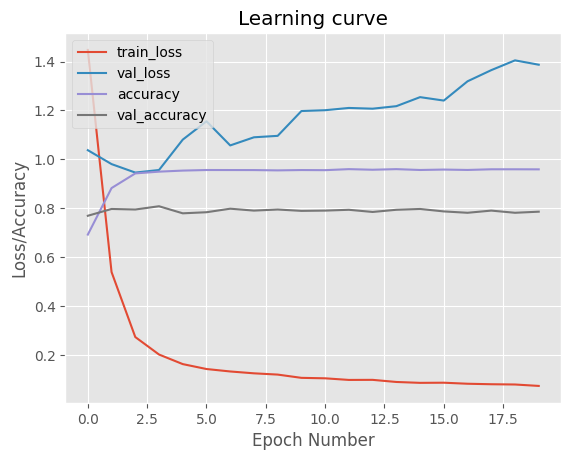

In [50]:
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_accuracy")
plt.title("Learning curve")
plt.xlabel("Epoch Number")
plt.ylabel("Loss/Accuracy")
plt.legend()

#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [57]:
# Evaluando el modelo de predicción con las imágenes de test
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
loss, accuracy = model.evaluate(x_test, y_test_oht, batch_size=64)
# Print network summary
print(model.summary())


[INFO]: Evaluando red neuronal...
36/36 [==============================] - 0s 5ms/step - loss: 1.2807 - accuracy: 0.7961
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1280128   
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 46)                2990      
                                                                 
Total params: 1291374 (4.93 MB)
Trainable params: 1291374 (4.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## **REGULARIZACIÓN EN APRENDIZAJE PROFUNDO**

#### **- Weight regularization L1/L2**

In [66]:
# Vamos a codificar la topología de nuestro MLP
# Importamos modulos necesarios para programar la red
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import regularizers

# Codificamos la arquitectura de nuestra primera red neuronal!
model = Sequential()
model.add(Dense(128, input_shape=(WORD_LIMIT,), activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001) ))
model.add(Dense(46, activation="softmax"))

In [67]:
# Ahora que tengo definida la arquitectura, la compilo
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [68]:
# A entrenar nuestra red neuronal sea dicho!
H = model.fit(x_train, y_train_oht, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
253/253 [==============================] - 3s 6ms/step - loss: 1.6115 - accuracy: 0.6950 - val_loss: 1.2871 - val_accuracy: 0.7675
Epoch 2/20
253/253 [==============================] - 1s 5ms/step - loss: 0.9186 - accuracy: 0.8566 - val_loss: 1.2584 - val_accuracy: 0.7942
Epoch 3/20
253/253 [==============================] - 1s 4ms/step - loss: 0.7396 - accuracy: 0.9076 - val_loss: 1.2395 - val_accuracy: 0.7987
Epoch 4/20
253/253 [==============================] - 1s 4ms/step - loss: 0.6736 - accuracy: 0.9235 - val_loss: 1.2304 - val_accuracy: 0.8076
Epoch 5/20
253/253 [==============================] - 1s 4ms/step - loss: 0.6347 - accuracy: 0.9271 - val_loss: 1.2475 - val_accuracy: 0.7887
Epoch 6/20
253/253 [==============================] - 1s 5ms/step - loss: 0.6189 - accuracy: 0.9318 - val_loss: 1.2127 - val_accuracy: 0.8098
Epoch 7/20
253/253 [==============================] - 1s 4ms/step - loss: 0.6047 - accuracy: 0.9333 - val_loss: 1.3327 - val_accuracy: 0.7798
Epoch 

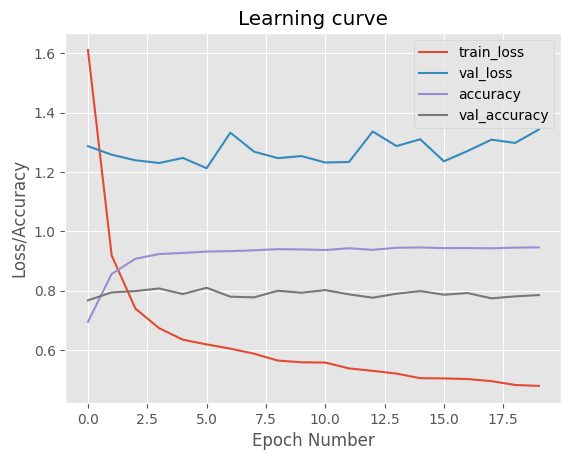

In [69]:
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_accuracy")
plt.title("Learning curve")
plt.xlabel("Epoch Number")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [65]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
loss, accuracy = model.evaluate(x_test, y_test_oht, batch_size=64)
# Print network summary
print(model.summary())


[INFO]: Evaluando red neuronal...
36/36 [==============================] - 0s 5ms/step - loss: 1.4346 - accuracy: 0.7667
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               1280128   
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 46)                2990      
                                                                 
Total params: 1291374 (4.93 MB)
Trainable params: 1291374 (4.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


#### **- Dropout**

In [ ]:
# Vamos a codificar la topología de nuestro MLP


In [ ]:
# Ahora que tengo definida la arquitectura, la compilo


In [ ]:
# A entrenar nuestra red neuronal sea dicho!


In [ ]:
# Muestro gráfica de accuracy y losses


In [ ]:
# Evaluando el modelo de predicción con las imágenes de test


#### **- Batch Normalization**

In [ ]:
# Vamos a codificar la topología de nuestro MLP


In [ ]:
# Ahora que tengo definida la arquitectura, la compilo


In [ ]:
# A entrenar nuestra red neuronal sea dicho!


In [ ]:
# Muestro gráfica de accuracy y losses


In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
